# The birthday problem here and elsewhere 

- toc: true
- branch: master
- badges: true
- comments: true

## Introduction

The birthday problem is a classic probabilistic puzzle concerning the probability of any two people among $n$ people in a group sharing the same birthday.

> In a group of $n$ people, what is the probability that two of these people share a birthday?

The intuition around the puzzle is very misleading, so much so that it is sometimes called the birthday *paradox*, even though there is ultimately no paradox in the problem or its solution. 

## Birthday Problem *Here*

In fact, given some reasonable assumptions, there is a simple closed form expression for the probability:

$p(n)=\frac{365 !}{365^{n}(365-n) !}$

under the assumption that all $n$ birthdays are drawn uniformly at random from 365 possible dates.

However, this model leads to some very surprising results when we consider the probabilities of finding shared birthdays in groups of different size $n$. 

We can ask more interesting questions: for instance, what group size $n$ would result in a 50% chance of a shared birthday within the group? As an upper bound on $n$, a party of size $n=366$ *must* have two individuals that share the same birthday, for $p=1.0$, since there are only 365 unique birthdays to be assigned [(by the famous ***pigeonhole principle***)](https://en.wikipedia.org/wiki/Pigeonhole_principle).  The answer for $p=0.5$, it turns out, is only $n=23$. 

***There is >50% probability that among a group of 23 people, 2 share a birthday!***

This is such a surprising conclusion that the whole problem is sometimes called a *paradox*! 

Fortunately, verifying this result can be done with simulation just as well as with analytical methods. The code below assembles groups individual by individual, stopping when two individuals share a birthday. This is detected when a `list` of day numbers differs in size from a `set` of day numbers, because a `set` discards duplicates while a `list` does not:

In [1]:
import random

def birthday_sim(n_days=365):
  dates = []
  while len(set(dates)) == len(dates):
    dates.append(random.randint(1,n_days + 1))
  return len(dates)


This code can easily run 100,000 simulations:

In [2]:
sims_100k = [birthday_sim() for x in range(100000)]

The distribution is right-skewed, which we'd expect with a distribution centered at near 20 but taking values up to 365. The peak near 20 confirms the conclusion above that a value in this area corresponds to the 50th percentile, or the approximation of $p=0.5$ in this sample.

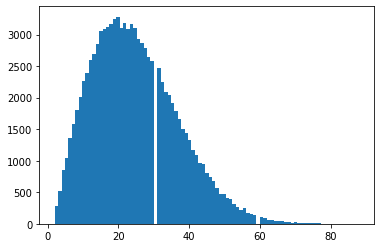

In [3]:
import matplotlib.pyplot as plt

hist100k = plt.hist(sims_100k, bins = 89)

The median represents the 50th percentile/2nd quantile/50% probability and sits exactly at 23:

In [4]:
import statistics

statistics.median(sims_100k)

23.0

The CDF gives a nice view of the problem: now we can read off the probabilities and the corresponding group size $n$. Here we find a few more surprising conclusions: we hit 80% probability of having a shared birthday just under $n=40$, and a 90% probability just over $n=40$. 

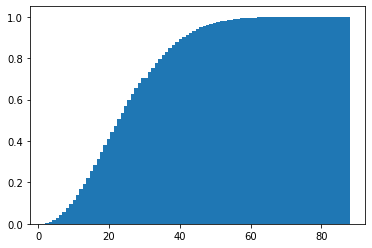

In [5]:
hist100k = plt.hist(sims_100k, bins = 89, cumulative=True, density=True)

In group sizes over $n=60$ finding a shared birthday should be a near certainty. [The table](https://en.wikipedia.org/wiki/Birthday_problem#Calculating_the_probability) puts the probability at 99.4% where $n=60$. 

This phenomenon is likely so unintuitive partially because the question is misunderstood. "Find any two people with the same birthday" can so easily be misunderstood as "Select one person, and find another person with the same birthday", or "find one person in the group that shares MY birthday". Neither of these is the correct interpretation. There is no need to match a specific person, or a specific date. These interpretations lack the combinatorial characteristic that makes these probabilities so high for low $n$; there are just so many different ways of combining $n$ people into groups of two! 



## Birthday Problem Elsewhere

Another advantage of the simulation method is *flexibility*. If we imagine we're meeting groups of $n$ individuals born on a different planet with a different year length, there is no need to re-derive the equation above because the simulation method adapts seamlessly to the new problem. We simply have to change the `n_days` parameter.

For example, a single year lasts 88 earth days on Mercury (though a Mercury day lasts 2 Mercury years!):

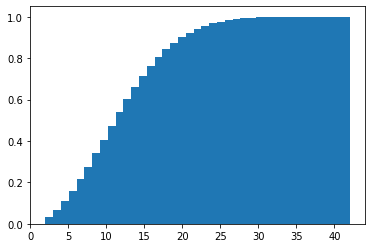

In [6]:
mercury_sims_100k = [birthday_sim(88) for x in range(100000)]

hist100k = plt.hist(mercury_sims_100k, bins = 39, cumulative=True, density=True)

In [17]:
statistics.median(mercury_sims_100k)

12.0

So the corresponding value for 50% probability on Mercury? $n=12$.

Clearly, the simulation technique is well suited to this problem - in fact, this class of problems - and might even be considered an improvement on the available analytical methods!